In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 

import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import time

In [2]:
status = pd.read_csv("./bikeshare/status.csv")
status

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01
...,...,...,...,...
71984429,84,8,7,2015-08-31 23:55:02
71984430,84,8,7,2015-08-31 23:56:01
71984431,84,8,7,2015-08-31 23:57:02
71984432,84,8,7,2015-08-31 23:58:02


In [7]:
status_c = status.copy()
status_c['city_zip'] = ''
status_c.loc[:, 'city_zip'] = status_c.loc[:, 'station_id'].apply(lambda x: city2zip[id2city[x]])
# station.loc[station['id'] == x, 'city'].values[0]
status_c

,station_id,bikes_available,docks_available,time,city_zip
0,2,2,25,2013/08/29 12:06:01,95113
1,2,2,25,2013/08/29 12:07:01,95113
2,2,2,25,2013/08/29 12:08:01,95113
3,2,2,25,2013/08/29 12:09:01,95113
4,2,2,25,2013/08/29 12:10:01,95113
...,...,...,...,...,...
71984429,84,8,7,2015-08-31 23:55:02,95113
71984430,84,8,7,2015-08-31 23:56:01,95113
71984431,84,8,7,2015-08-31 23:57:02,95113
71984432,84,8,7,2015-08-31 23:58:02,95113


In [4]:
status.station_id.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42,
       45, 46, 47, 48, 49, 50, 51, 39, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 82,
       83, 84], dtype=int64)

In [5]:
station = pd.read_csv("./bikeshare/station.csv")
station

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
...,...,...,...,...,...,...,...
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014


In [6]:
city2zip = {'San Francisco':94107, 'Redwood City':94063, 'Palo Alto':94301, 'Mountain View':94041, 'San Jose':95113}
id2city = dict()
for i in range(station.shape[0]):
    id2city[station.loc[i, 'id']] = station.loc[i, 'city']
id2city

{2: 'San Jose',
 3: 'San Jose',
 4: 'San Jose',
 5: 'San Jose',
 6: 'San Jose',
 7: 'San Jose',
 8: 'San Jose',
 9: 'San Jose',
 10: 'San Jose',
 11: 'San Jose',
 12: 'San Jose',
 13: 'San Jose',
 14: 'San Jose',
 16: 'San Jose',
 21: 'Redwood City',
 22: 'Redwood City',
 23: 'Redwood City',
 24: 'Redwood City',
 25: 'Redwood City',
 26: 'Redwood City',
 27: 'Mountain View',
 28: 'Mountain View',
 29: 'Mountain View',
 30: 'Mountain View',
 31: 'Mountain View',
 32: 'Mountain View',
 33: 'Mountain View',
 34: 'Palo Alto',
 35: 'Palo Alto',
 36: 'Palo Alto',
 37: 'Palo Alto',
 38: 'Palo Alto',
 41: 'San Francisco',
 42: 'San Francisco',
 45: 'San Francisco',
 46: 'San Francisco',
 47: 'San Francisco',
 48: 'San Francisco',
 49: 'San Francisco',
 50: 'San Francisco',
 51: 'San Francisco',
 39: 'San Francisco',
 54: 'San Francisco',
 55: 'San Francisco',
 56: 'San Francisco',
 57: 'San Francisco',
 58: 'San Francisco',
 59: 'San Francisco',
 60: 'San Francisco',
 61: 'San Francisco',
 62:

In [8]:
trip = pd.read_csv("./bikeshare/trip.csv")
trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
...,...,...,...,...,...,...,...,...,...,...,...
669954,432951,619,9/1/2014 4:21,Powell Street BART,39,9/1/2014 4:32,Townsend at 7th,65,335,Subscriber,94118
669955,432950,6712,9/1/2014 3:16,Harry Bridges Plaza (Ferry Building),50,9/1/2014 5:08,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
669956,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32
669957,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32


In [9]:
trip.zip_code.unique()

array(['94127', '95138', '97214', ..., '2400105', '1004004', '29609'],
      dtype=object)

In [10]:
weather = pd.read_csv("./bikeshare/weather.csv")
weather.date = weather.date.apply(lambda x: x.split("/")[2] + "-" + x.split("/")[0] + "-" + x.split("/")[1])
weather.date = pd.to_datetime(weather.date).dt.strftime('%Y/%m/%d')
weather

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013/08/29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,2013/08/30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,2013/08/31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,2013/09/01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,2013/09/02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,2015/08/27,92.0,78.0,63.0,57.0,51.0,40.0,78.0,48.0,18.0,...,10.0,10.0,23.0,6.0,29.0,0,3.0,NaN,313.0,95113
3661,2015/08/28,95.0,80.0,64.0,64.0,56.0,52.0,93.0,60.0,26.0,...,10.0,10.0,25.0,7.0,30.0,0,3.0,NaN,307.0,95113
3662,2015/08/29,80.0,72.0,64.0,65.0,62.0,54.0,93.0,70.0,47.0,...,10.0,10.0,21.0,9.0,26.0,0,4.0,NaN,312.0,95113
3663,2015/08/30,78.0,70.0,62.0,60.0,57.0,53.0,84.0,64.0,43.0,...,10.0,10.0,22.0,10.0,29.0,0,3.0,NaN,291.0,95113


In [11]:
weather.zip_code.unique()

array([94107, 94063, 94301, 94041, 95113], dtype=int64)

In [12]:
weather.events.unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'],
      dtype=object)

In [13]:
weather.events = weather.events.apply(lambda x: 0 if type(x) == np.float else 1) # nan <-- np.float
weather.fillna(method='ffill', inplace=True)
weather

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013/08/29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,0,286.0,94107
1,2013/08/30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,0,291.0,94107
2,2013/08/31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,0,284.0,94107
3,2013/09/01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,0,284.0,94107
4,2013/09/02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,0,277.0,94107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,2015/08/27,92.0,78.0,63.0,57.0,51.0,40.0,78.0,48.0,18.0,...,10.0,10.0,23.0,6.0,29.0,0,3.0,0,313.0,95113
3661,2015/08/28,95.0,80.0,64.0,64.0,56.0,52.0,93.0,60.0,26.0,...,10.0,10.0,25.0,7.0,30.0,0,3.0,0,307.0,95113
3662,2015/08/29,80.0,72.0,64.0,65.0,62.0,54.0,93.0,70.0,47.0,...,10.0,10.0,21.0,9.0,26.0,0,4.0,0,312.0,95113
3663,2015/08/30,78.0,70.0,62.0,60.0,57.0,53.0,84.0,64.0,43.0,...,10.0,10.0,22.0,10.0,29.0,0,3.0,0,291.0,95113


In [14]:
weather.isna().any()

date                              False
max_temperature_f                 False
mean_temperature_f                False
min_temperature_f                 False
max_dew_point_f                   False
mean_dew_point_f                  False
min_dew_point_f                   False
max_humidity                      False
mean_humidity                     False
min_humidity                      False
max_sea_level_pressure_inches     False
mean_sea_level_pressure_inches    False
min_sea_level_pressure_inches     False
max_visibility_miles              False
mean_visibility_miles             False
min_visibility_miles              False
max_wind_Speed_mph                False
mean_wind_speed_mph               False
max_gust_speed_mph                False
precipitation_inches              False
cloud_cover                       False
events                            False
wind_dir_degrees                  False
zip_code                          False
dtype: bool

In [15]:
trips = pd.DataFrame(data=0, columns=status.station_id.unique(), index=range(trip.shape[0]))
trips

,2,3,4,5,6,7,8,9,10,11,...,72,73,74,75,76,77,80,82,83,84
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
start = time.time()
for i in range(trip.shape[0]):
    s = trip.loc[i,'start_station_id']
    e = trip.loc[i,'end_station_id']
    trips.loc[i, s]=1
    trips.loc[i, e]=1
end = time.time()
print(f'done, {str(end-start)} sec')

done, 85.42443799972534 sec


In [17]:
trips

,2,3,4,5,6,7,8,9,10,11,...,72,73,74,75,76,77,80,82,83,84
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
start = time.time()
frequent_itemsets = apriori(trips, min_support=0.001, use_colnames=True, max_len=2, low_memory=True)
end = time.time()
print(f'done, {end-start} sec')
frequent_itemsets

done, 1.4459493160247803 sec


,support,itemsets
0,0.028035,(2)
1,0.004461,(3)
2,0.010998,(4)
3,0.003505,(5)
4,0.008781,(6)
...,...,...
340,0.002123,"(75, 76)"
341,0.001603,"(82, 75)"
342,0.001712,"(76, 77)"
343,0.001566,"(82, 77)"


In [19]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.15)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3),(2),0.004461,0.028035,0.001237,0.277350,9.893159,0.001112,1.345002
1,(2),(4),0.028035,0.010998,0.006691,0.238686,21.703287,0.006383,1.299073
2,(4),(2),0.010998,0.028035,0.006691,0.608442,21.703287,0.006383,2.482302
3,(5),(2),0.003505,0.028035,0.001961,0.559625,19.961982,0.001863,2.207132
4,(6),(2),0.008781,0.028035,0.003651,0.415774,14.830780,0.003405,1.663681
5,(7),(2),0.006839,0.028035,0.002540,0.371454,13.249847,0.002349,1.546370
6,(9),(2),0.005791,0.028035,0.001600,0.276289,9.855291,0.001438,1.343029
7,(10),(2),0.005705,0.028035,0.001843,0.323129,11.526107,0.001683,1.435969
8,(11),(2),0.006514,0.028035,0.002409,0.369844,13.192442,0.002226,1.542421
9,(13),(2),0.004602,0.028035,0.001851,0.402206,14.346784,0.001722,1.625919


In [20]:
rules = rules[rules['lift'] >= 1]
rules = rules.sort_values(by=['support', 'confidence', 'lift'], ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37,(65),(69),0.074536,0.102153,0.014495,0.194469,1.903711,0.006881,1.114603
29,(60),(50),0.084210,0.096116,0.014023,0.166528,1.732565,0.005929,1.084480
30,(61),(50),0.080129,0.096116,0.013726,0.171302,1.782235,0.006025,1.090727
34,(74),(60),0.073430,0.084210,0.011023,0.150117,1.782657,0.004840,1.077549
36,(64),(77),0.052099,0.077318,0.010529,0.202097,2.613838,0.006501,1.156384
31,(51),(70),0.040641,0.166783,0.010445,0.257015,1.541010,0.003667,1.121445
32,(39),(69),0.056215,0.102153,0.009392,0.167065,1.635446,0.003649,1.077932
38,(72),(65),0.041801,0.074536,0.008015,0.191751,2.572605,0.004900,1.145024
15,(27),(28),0.009062,0.019009,0.007563,0.834624,43.907625,0.007391,5.931871
16,(28),(27),0.019009,0.009062,0.007563,0.397880,43.907625,0.007391,1.645748


In [21]:
# len(rules.antecedents.unique()) # 37
len(rules.consequents.unique()) # 21

21

In [22]:
rules.to_csv("./bikeshare/trip_association_rules.csv")

In [31]:
status.loc[0, 'time']

'2013/08/29 12:06:01'

In [212]:
s2 = status_c.loc[status_c['station_id']==2, :]
s2

,station_id,bikes_available,docks_available,time,city_zip
0,2,2,25,2013/08/29 12:06:01,95113
1,2,2,25,2013/08/29 12:07:01,95113
2,2,2,25,2013/08/29 12:08:01,95113
3,2,2,25,2013/08/29 12:09:01,95113
4,2,2,25,2013/08/29 12:10:01,95113
...,...,...,...,...,...
35860185,2,18,9,2015-08-31 23:55:02,95113
35860186,2,18,9,2015-08-31 23:56:01,95113
35860187,2,18,9,2015-08-31 23:57:02,95113
35860188,2,18,9,2015-08-31 23:58:02,95113


In [213]:
# 注意時間的格式(避免無法merge)
# The day of the week with Monday=0, Sunday=6.
s2['dayofweek'] = pd.to_datetime(s2.time, format='%Y-%m-%d %H:%M:%S').dt.dayofweek
s2['hour'] = pd.to_datetime(s2.time, format='%Y-%m-%d %H:%M:%S').dt.hour
s2['time'] = pd.to_datetime(s2['time'].str[:10]).dt.strftime('%Y/%m/%d')
# s2['time'] = s2['time'].str[:10]
# s2 = s2.drop('time', axis=1)
s2

<ipython-input-213-f4bef2642c23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['dayofweek'] = pd.to_datetime(s2.time, format='%Y-%m-%d %H:%M:%S').dt.dayofweek
<ipython-input-213-f4bef2642c23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['hour'] = pd.to_datetime(s2.time, format='%Y-%m-%d %H:%M:%S').dt.hour
<ipython-input-213-f4bef2642c23>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,station_id,bikes_available,docks_available,time,city_zip,dayofweek,hour
0,2,2,25,2013/08/29,95113,3,12
1,2,2,25,2013/08/29,95113,3,12
2,2,2,25,2013/08/29,95113,3,12
3,2,2,25,2013/08/29,95113,3,12
4,2,2,25,2013/08/29,95113,3,12
...,...,...,...,...,...,...,...
35860185,2,18,9,2015/08/31,95113,0,23
35860186,2,18,9,2015/08/31,95113,0,23
35860187,2,18,9,2015/08/31,95113,0,23
35860188,2,18,9,2015/08/31,95113,0,23


In [214]:
weather[weather['zip_code'] == 95113]

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
736,2013/08/29,81.0,72.0,63.0,62.0,61.0,59.0,87.0,69.0,51.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,0,320.0,95113
737,2013/08/30,88.0,76.0,63.0,63.0,60.0,55.0,93.0,65.0,37.0,...,10.0,10.0,18.0,5.0,22.0,0,2.0,0,316.0,95113
738,2013/08/31,80.0,71.0,62.0,59.0,57.0,54.0,90.0,66.0,42.0,...,10.0,10.0,18.0,8.0,22.0,0,0.0,0,309.0,95113
739,2013/09/01,81.0,72.0,62.0,61.0,57.0,51.0,84.0,62.0,39.0,...,10.0,10.0,20.0,7.0,24.0,0,2.0,0,308.0,95113
740,2013/09/02,79.0,73.0,66.0,62.0,61.0,59.0,81.0,68.0,54.0,...,10.0,10.0,21.0,8.0,25.0,T,5.0,1,315.0,95113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,2015/08/27,92.0,78.0,63.0,57.0,51.0,40.0,78.0,48.0,18.0,...,10.0,10.0,23.0,6.0,29.0,0,3.0,0,313.0,95113
3661,2015/08/28,95.0,80.0,64.0,64.0,56.0,52.0,93.0,60.0,26.0,...,10.0,10.0,25.0,7.0,30.0,0,3.0,0,307.0,95113
3662,2015/08/29,80.0,72.0,64.0,65.0,62.0,54.0,93.0,70.0,47.0,...,10.0,10.0,21.0,9.0,26.0,0,4.0,0,312.0,95113
3663,2015/08/30,78.0,70.0,62.0,60.0,57.0,53.0,84.0,64.0,43.0,...,10.0,10.0,22.0,10.0,29.0,0,3.0,0,291.0,95113


In [215]:
pd.merge(s2, weather[weather['zip_code'] == 95113], left_on=['time', 'city_zip'], right_on=['date', 'zip_code'])

,station_id,bikes_available,docks_available,time,city_zip,dayofweek,hour,date,max_temperature_f,mean_temperature_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2,2,25,2013/08/29,95113,3,12,2013/08/29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,0,320.0,95113
1,2,2,25,2013/08/29,95113,3,12,2013/08/29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,0,320.0,95113
2,2,2,25,2013/08/29,95113,3,12,2013/08/29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,0,320.0,95113
3,2,2,25,2013/08/29,95113,3,12,2013/08/29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,0,320.0,95113
4,2,2,25,2013/08/29,95113,3,12,2013/08/29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,0,320.0,95113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046893,2,18,9,2015/08/31,95113,0,23,2015/08/31,85.0,72.0,...,10.0,10.0,20.0,6.0,24.0,0,1.0,0,308.0,95113
1046894,2,18,9,2015/08/31,95113,0,23,2015/08/31,85.0,72.0,...,10.0,10.0,20.0,6.0,24.0,0,1.0,0,308.0,95113
1046895,2,18,9,2015/08/31,95113,0,23,2015/08/31,85.0,72.0,...,10.0,10.0,20.0,6.0,24.0,0,1.0,0,308.0,95113
1046896,2,18,9,2015/08/31,95113,0,23,2015/08/31,85.0,72.0,...,10.0,10.0,20.0,6.0,24.0,0,1.0,0,308.0,95113


In [216]:
s2 = s2.groupby(['time', 'hour']).mean()
s2.reset_index(inplace=True, level=['time', 'hour'])
s2

,time,hour,station_id,bikes_available,docks_available,city_zip,dayofweek
0,2013/08/29,12,2.0,2.000000,25.000000,95113.0,3.0
1,2013/08/29,13,2.0,2.698113,24.301887,95113.0,3.0
2,2013/08/29,14,2.0,2.000000,25.000000,95113.0,3.0
3,2013/08/29,15,2.0,2.000000,25.000000,95113.0,3.0
4,2013/08/29,16,2.0,2.000000,25.000000,95113.0,3.0
...,...,...,...,...,...,...,...
17522,2015/08/31,19,2.0,17.900000,9.100000,95113.0,0.0
17523,2015/08/31,20,2.0,18.000000,9.000000,95113.0,0.0
17524,2015/08/31,21,2.0,18.000000,9.000000,95113.0,0.0
17525,2015/08/31,22,2.0,18.000000,9.000000,95113.0,0.0


In [217]:
s2_X = pd.merge(s2, weather[weather['zip_code'] == 95113], left_on=['time', 'city_zip'], right_on=['date', 'zip_code'])
s2_X

,time,hour,station_id,bikes_available,docks_available,city_zip,dayofweek,date,max_temperature_f,mean_temperature_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013/08/29,12,2.0,2.000000,25.000000,95113.0,3.0,2013/08/29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,0,320.0,95113
1,2013/08/29,13,2.0,2.698113,24.301887,95113.0,3.0,2013/08/29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,0,320.0,95113
2,2013/08/29,14,2.0,2.000000,25.000000,95113.0,3.0,2013/08/29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,0,320.0,95113
3,2013/08/29,15,2.0,2.000000,25.000000,95113.0,3.0,2013/08/29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,0,320.0,95113
4,2013/08/29,16,2.0,2.000000,25.000000,95113.0,3.0,2013/08/29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,0,320.0,95113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17522,2015/08/31,19,2.0,17.900000,9.100000,95113.0,0.0,2015/08/31,85.0,72.0,...,10.0,10.0,20.0,6.0,24.0,0,1.0,0,308.0,95113
17523,2015/08/31,20,2.0,18.000000,9.000000,95113.0,0.0,2015/08/31,85.0,72.0,...,10.0,10.0,20.0,6.0,24.0,0,1.0,0,308.0,95113
17524,2015/08/31,21,2.0,18.000000,9.000000,95113.0,0.0,2015/08/31,85.0,72.0,...,10.0,10.0,20.0,6.0,24.0,0,1.0,0,308.0,95113
17525,2015/08/31,22,2.0,18.000000,9.000000,95113.0,0.0,2015/08/31,85.0,72.0,...,10.0,10.0,20.0,6.0,24.0,0,1.0,0,308.0,95113


In [218]:
s2_X.isna().any()

time                              False
hour                              False
station_id                        False
bikes_available                   False
docks_available                   False
city_zip                          False
dayofweek                         False
date                              False
max_temperature_f                 False
mean_temperature_f                False
min_temperature_f                 False
max_dew_point_f                   False
mean_dew_point_f                  False
min_dew_point_f                   False
max_humidity                      False
mean_humidity                     False
min_humidity                      False
max_sea_level_pressure_inches     False
mean_sea_level_pressure_inches    False
min_sea_level_pressure_inches     False
max_visibility_miles              False
mean_visibility_miles             False
min_visibility_miles              False
max_wind_Speed_mph                False
mean_wind_speed_mph               False


In [219]:
s2_X.loc[s2_X.max_gust_speed_mph.isna(), :].time.unique()

array([], dtype=object)

<AxesSubplot:xlabel='time,hour'>

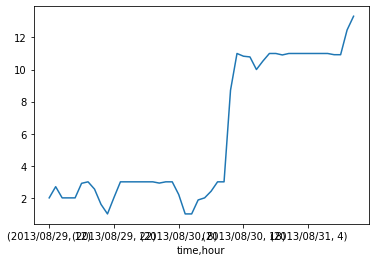

In [64]:
s2.bikes_available[:48].plot()